# Pokemon Data Analysis
---

This project is part of my "100 Days of Data Projects."


With this Pokemon data, I have two goals:

- **Classification:** Using just the base stats of a Pokemon, could we classify if a Pokemon's Primary Type is a Dragon type?

- **Regression:** Can we create a regression model that predicts a Pokemon's HP stat?


---


This dataset consists of all Pokemon from the first 8 generations. (All the current Pokemon as of June 2022.)

Source: https://www.kaggle.com/datasets/maca11/all-pokemon-dataset

---
# Part 1: Classification of Dragon-Types
---

# Import Data and Packages

In [231]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

original_data = pd.read_csv("pokemon_data.csv")

original_data.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


# Select Rows and Columns to Use


### Check columns

In [232]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

- Remove Mega Evolutions because their stats may be different

- Removing rows of Pokemon that have Type 2 

    - Having a second type might change the Pokemon's stats

In [233]:
# keep the columns to be used
filtered_data = original_data[["HP", "Att", "Def", "Spa",
                               "Spd", "Spe", "Generation",
                               "Experience type",
                               "Experience to level 100",
                               "Catch Rate", "Height",
                               "Weight", "Type 1"]]

# filter rows
notMega = original_data["Mega Evolution"] == False
noType2 = pd.notna(original_data["Type 2"])

filtered_data = filtered_data[notMega & noType2]


# Prints ======================

print("\n")
print("filtered_data.shape = ", filtered_data.shape)

print("\n")
print(filtered_data.info())



filtered_data.shape =  (508, 13)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 1031
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HP                       508 non-null    int64  
 1   Att                      508 non-null    int64  
 2   Def                      508 non-null    int64  
 3   Spa                      508 non-null    int64  
 4   Spd                      508 non-null    int64  
 5   Spe                      508 non-null    int64  
 6   Generation               508 non-null    float64
 7   Experience type          508 non-null    object 
 8   Experience to level 100  508 non-null    int64  
 9   Catch Rate               508 non-null    int64  
 10  Height                   508 non-null    float64
 11  Weight                   508 non-null    float64
 12  Type 1                   508 non-null    object 
dtypes: float64(3), int64(8), object(2)
memory 

## Create Binary Outcome "isDragon"

In [234]:
# create binary feature isDragon
filtered_data["isDragon"] = filtered_data["Type 1"] == "Dragon"

filtered_data["isDragon"] = filtered_data["isDragon"].map({True: 1, False: 0})

# drop column Type 1 as it is no longer needed
filtered_data = filtered_data.drop("Type 1", axis=1)

# Prints  ======================

print("\n")
print("filtered_data.shape = ", filtered_data.shape)

print("\n")
print(filtered_data.head())



filtered_data.shape =  (508, 13)


    HP  Att  Def  Spa  Spd  Spe  Generation Experience type  \
0   45   49   49   65   65   45         1.0     Medium Slow   
1   60   62   63   80   80   60         1.0     Medium Slow   
2   80   82   83  100  100   80         1.0     Medium Slow   
6   78   84   78  109   85  100         1.0     Medium Slow   
15  60   45   50   90   80   70         1.0     Medium Fast   

    Experience to level 100  Catch Rate  Height  Weight  isDragon  
0                   1059860          45     0.7     6.9         0  
1                   1059860          45     1.0    13.0         0  
2                   1059860          45     2.0   100.0         0  
6                   1059860          45     1.7    90.5         0  
15                  1000000          45     1.1    32.0         0  


In [235]:
print(filtered_data["isDragon"].value_counts())

0    485
1     23
Name: isDragon, dtype: int64


# Train-Test Split Stratified

In [236]:
# import package
from sklearn.model_selection import train_test_split


# declare our X inputs and y outcomes
X = filtered_data.drop("isDragon", axis=1)
y = filtered_data["isDragon"]


# stratify split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

print("\n")
print("y_train class proportions: \n", y_train.value_counts(normalize=True))

print("\n")
print("y_test class proportions: \n", y_test.value_counts(normalize=True))

X_train.shape =  (406, 12)
X_test.shape =  (102, 12)
y_train.shape =  (406,)
y_test.shape =  (102,)


y_train class proportions: 
 0    0.955665
1    0.044335
Name: isDragon, dtype: float64


y_test class proportions: 
 0    0.95098
1    0.04902
Name: isDragon, dtype: float64


# Check the training set for missing values

In [237]:
# combine the X_train and y_train into a dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# check records and features
print(training_set.shape)

(406, 13)


In [238]:
training_set.describe()

,HP,Att,Def,Spa,Spd,Spe,Generation,Experience to level 100,Catch Rate,Height,Weight,isDragon
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,4.060000e+02,406.000000,406.000000,406.000000,406.000000
mean,71.926108,82.187192,77.453202,75.788177,73.901478,69.268473,4.534483,1.074576e+06,86.379310,1.383744,75.687438,0.044335
std,25.663722,30.976764,29.540623,32.126363,26.608087,28.948730,2.272225,1.418576e+05,72.044252,1.573384,121.926737,0.206092
min,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000,6.000000e+05,3.000000,0.200000,0.100000,0.000000
25%,55.000000,60.000000,55.000000,50.000000,55.000000,45.000000,3.000000,1.000000e+06,45.000000,0.600000,10.500000,0.000000
50%,70.000000,80.000000,75.000000,70.500000,71.000000,68.500000,5.000000,1.059860e+06,60.000000,1.100000,33.000000,0.000000
75%,90.000000,100.000000,95.000000,98.000000,90.000000,91.000000,7.000000,1.250000e+06,120.000000,1.600000,80.875000,0.000000
max,223.000000,181.000000,230.000000,170.000000,230.000000,160.000000,8.000000,1.640000e+06,255.000000,20.000000,950.000000,1.000000


# Check for missing data

In [239]:
# Check for any missing values
print(training_set.isnull().values.any())

# Check number of missing values
print("Count of na's:", training_set.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", training_set.isna().any(axis=1).sum())

False
Count of na's: 0
Cases with missing values: 0


# Explore Training Set

In [240]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:>

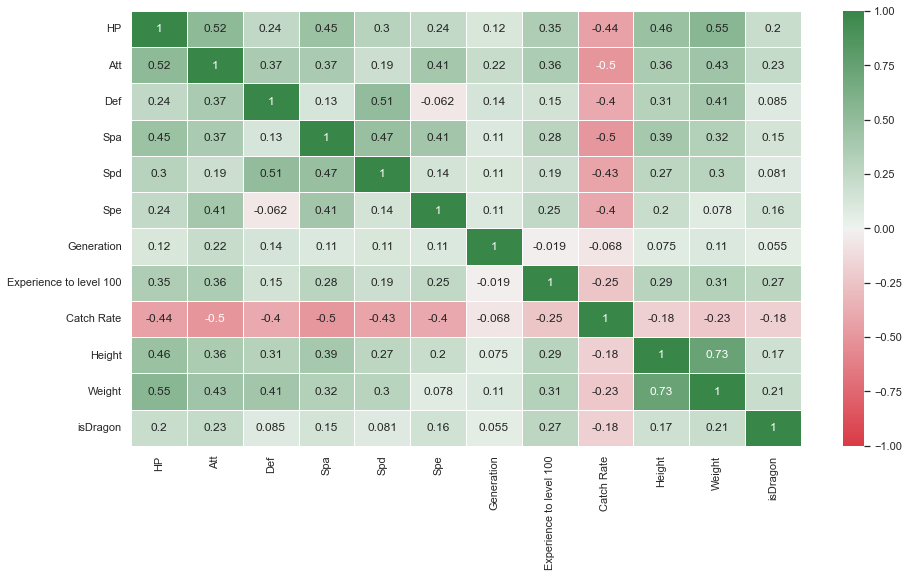

In [241]:
# calculate the correlation matrix
corr_matrix = training_set.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

array([[<AxesSubplot:xlabel='isDragon', ylabel='isDragon'>,
        <AxesSubplot:xlabel='Experience to level 100', ylabel='isDragon'>,
        <AxesSubplot:xlabel='Weight', ylabel='isDragon'>,
        <AxesSubplot:xlabel='Att', ylabel='isDragon'>,
        <AxesSubplot:xlabel='HP', ylabel='isDragon'>],
       [<AxesSubplot:xlabel='isDragon', ylabel='Experience to level 100'>,
        <AxesSubplot:xlabel='Experience to level 100', ylabel='Experience to level 100'>,
        <AxesSubplot:xlabel='Weight', ylabel='Experience to level 100'>,
        <AxesSubplot:xlabel='Att', ylabel='Experience to level 100'>,
        <AxesSubplot:xlabel='HP', ylabel='Experience to level 100'>],
       [<AxesSubplot:xlabel='isDragon', ylabel='Weight'>,
        <AxesSubplot:xlabel='Experience to level 100', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Att', ylabel='Weight'>,
        <AxesSubplot:xlabel='HP', ylabel='Weight'>],
       [<AxesSubplot:xlabe

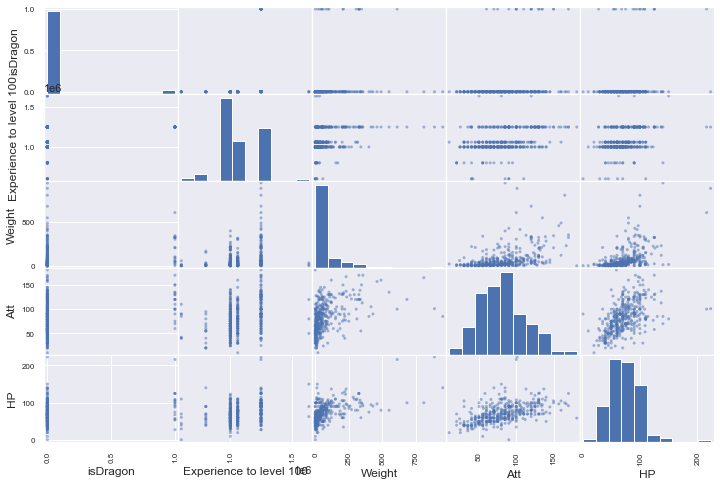

In [242]:
features = ["isDragon", "Experience to level 100", "Weight", "Att", "HP"]

pd.plotting.scatter_matrix(training_set[features],
                          figsize=(12, 8))

array([[<AxesSubplot:title={'center':'HP'}>,
        <AxesSubplot:title={'center':'Att'}>,
        <AxesSubplot:title={'center':'Def'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'Spd'}>,
        <AxesSubplot:title={'center':'Spe'}>],
       [<AxesSubplot:title={'center':'Generation'}>,
        <AxesSubplot:title={'center':'Experience to level 100'}>,
        <AxesSubplot:title={'center':'Catch Rate'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'isDragon'}>]], dtype=object)

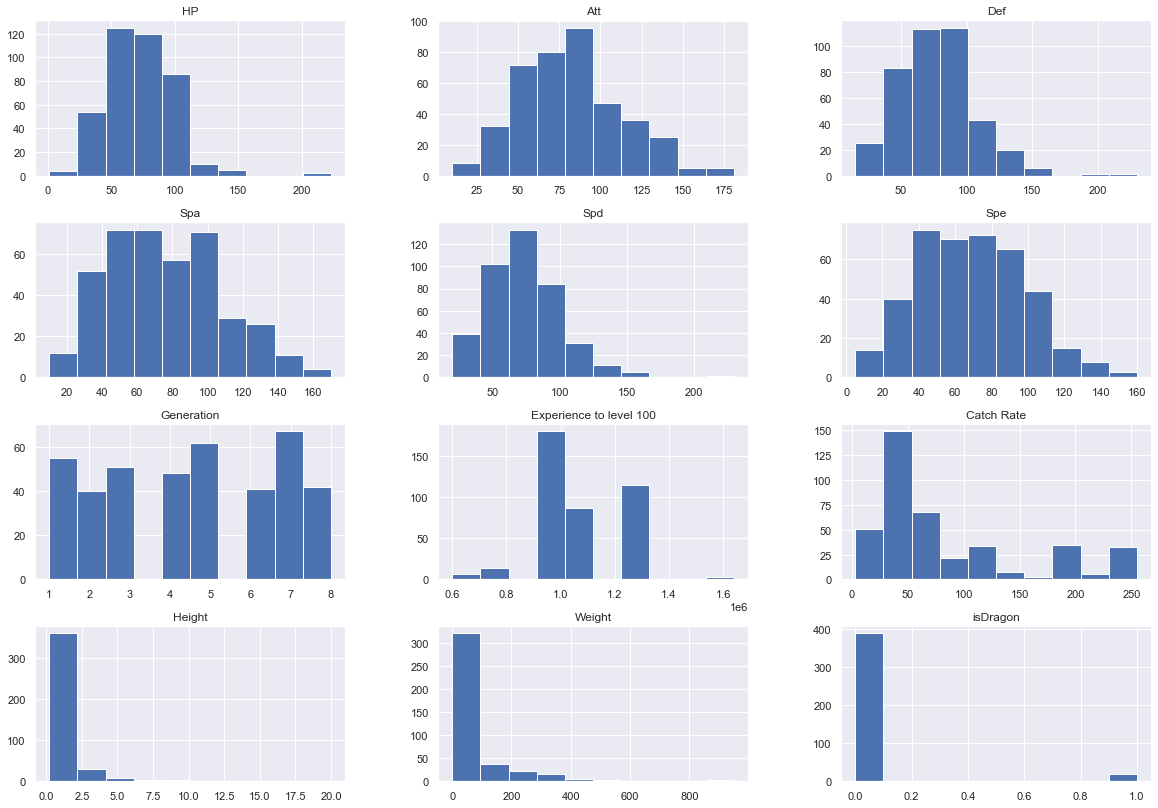

In [243]:
training_set.hist(figsize=(20,14))

# One-Hot Encode Categorical Features

In [244]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 168 to 808
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HP                       406 non-null    int64  
 1   Att                      406 non-null    int64  
 2   Def                      406 non-null    int64  
 3   Spa                      406 non-null    int64  
 4   Spd                      406 non-null    int64  
 5   Spe                      406 non-null    int64  
 6   Generation               406 non-null    float64
 7   Experience type          406 non-null    object 
 8   Experience to level 100  406 non-null    int64  
 9   Catch Rate               406 non-null    int64  
 10  Height                   406 non-null    float64
 11  Weight                   406 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 41.2+ KB


In [245]:
# One hot encode categorical features for the X_train and X_test sets

X_train = pd.get_dummies(X_train, columns=['Generation','Experience type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Generation','Experience type'], drop_first=True)

X_train.head()

,HP,Att,Def,Spa,Spd,Spe,Experience to level 100,Catch Rate,Height,Weight,Generation_2.0,Generation_3.0,Generation_4.0,Generation_5.0,Generation_6.0,Generation_7.0,Generation_8.0,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
168,130,85,80,85,95,60,1250000,45,2.5,220.0,0,0,0,0,0,0,0,0,0,0,0,1
694,70,77,60,97,60,108,1000000,75,0.8,14.3,0,0,0,1,0,0,0,0,0,1,0,0
301,106,130,90,110,154,90,1250000,3,3.8,199.0,1,0,0,0,0,0,0,0,0,0,0,1
96,80,120,130,55,65,45,1059860,45,1.4,300.0,0,0,0,0,0,0,0,0,0,0,1,0
654,50,65,85,35,35,55,1000000,190,0.3,14.5,0,0,0,1,0,0,0,0,0,1,0,0


# Feature Scaling on Continuous Features

**Check which features are continuous**

In [246]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 168 to 808
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HP                           406 non-null    int64  
 1   Att                          406 non-null    int64  
 2   Def                          406 non-null    int64  
 3   Spa                          406 non-null    int64  
 4   Spd                          406 non-null    int64  
 5   Spe                          406 non-null    int64  
 6   Experience to level 100      406 non-null    int64  
 7   Catch Rate                   406 non-null    int64  
 8   Height                       406 non-null    float64
 9   Weight                       406 non-null    float64
 10  Generation_2.0               406 non-null    uint8  
 11  Generation_3.0               406 non-null    uint8  
 12  Generation_4.0               406 non-null    uint8  
 13  Generation_5.0    

**Notes for Self:**
    
*Normalization or Min-Max Scaling* 
- The process of scaling data into a range of 0 - 1. 
- It's more useful and common for regression tasks.
- Useful when there are no outliers as it cannot cope up with them. 
- Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.
- It is really affected by outliers.

*Standardization or Z-Score Normalization*
- The process of scaling data so that they have a mean value of 0 and a standard deviation of 1. 
- (Converts to Z-scores where they're units of standard deviation from the mean.)
- It's more useful and common for classification tasks. 
- It is much less affected by outliers.

Sources: 
https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/
https://www.geeksforgeeks.org/normalization-vs-standardization/

**Feature Scale Continuous Features with Standardization**

In [247]:
# import scaling & column transformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Create a function to scale the train and test sets

def scaleCategoricalFeatures(X_data):
    

    # Select features to scale
    features = ["HP", "Att", "Def", "Spa", "Spd", "Spe", 
                "Experience to level 100", "Catch Rate", "Height", "Weight"]
    
    scaler = StandardScaler()

    X_data[features] = scaler.fit_transform(X_data[features])
    
    return X_data

X_train = scaleCategoricalFeatures(X_train)
X_test = scaleCategoricalFeatures(X_test)

print(X_train.shape)

(406, 22)


In [249]:
# see all columns
pd.set_option('display.max_columns', None)

X_train.head()

,HP,Att,Def,Spa,Spd,Spe,Experience to level 100,Catch Rate,Height,Weight,Generation_2.0,Generation_3.0,Generation_4.0,Generation_5.0,Generation_6.0,Generation_7.0,Generation_8.0,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
168,2.265671,0.090916,0.086320,0.287091,0.793915,-0.320564,1.238147,-0.575068,0.710337,1.185061,0,0,0,0,0,0,0,0,0,0,0,1
694,-0.075144,-0.167661,-0.591549,0.661077,-0.523098,1.339586,-0.526358,-0.158144,-0.371469,-0.504099,0,0,0,1,0,0,0,0,0,1,0,0
301,1.329345,1.545410,0.425254,1.066228,3.014022,0.717030,1.238147,-1.158763,1.537601,1.012614,1,0,0,0,0,0,0,0,0,0,0,1
96,0.314991,1.222189,1.780993,-0.647874,-0.334953,-0.839360,-0.103865,-0.575068,0.010345,1.842002,0,0,0,0,0,0,0,0,0,0,1,0
654,-0.855416,-0.555526,0.255787,-1.271184,-1.463821,-0.493496,-0.526358,1.440067,-0.689648,-0.502457,0,0,0,1,0,0,0,0,0,1,0,0


### Make sure it worked by seeing if Standard Deviations are 1

In [253]:
X_train.describe()

,HP,Att,Def,Spa,Spd,Spe,Experience to level 100,Catch Rate,Height,Weight,Generation_2.0,Generation_3.0,Generation_4.0,Generation_5.0,Generation_6.0,Generation_7.0,Generation_8.0,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
count,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,-2.036548e-16,-1.190892e-16,1.695756e-16,-8.249764e-17,5.920278e-17,-9.570888e-17,9.603703e-16,-2.201304e-17,1.091081e-16,3.363484e-17,0.098522,0.125616,0.118227,0.152709,0.100985,0.165025,0.103448,0.034483,0.007389,0.443350,0.214286,0.283251
std,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,0.298387,0.331825,0.323275,0.360151,0.301681,0.371661,0.304919,0.182691,0.085748,0.497393,0.410832,0.451133
min,-2.767082e+00,-2.333241e+00,-2.116755e+00,-2.050321e+00,-2.028255e+00,-2.222818e+00,-3.349567e+00,-1.158763e+00,-7.532835e-01,-6.207063e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.603482e-01,-7.171364e-01,-7.610166e-01,-8.037012e-01,-7.112424e-01,-8.393603e-01,-5.263585e-01,-5.750683e-01,-4.987408e-01,-5.353040e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-7.514439e-02,-7.069462e-02,-8.314749e-02,-1.648086e-01,-1.091795e-01,-2.657875e-02,-1.038652e-01,-3.666060e-01,-1.805623e-01,-3.505392e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.051273e-01,5.757472e-01,5.947216e-01,6.922423e-01,6.057702e-01,7.516164e-01,1.238147e+00,4.672430e-01,1.376161e-01,4.259904e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.893934e+00,3.193837e+00,5.170338e+00,2.936158e+00,5.873820e+00,3.138081e+00,3.990776e+00,2.343403e+00,1.184658e+01,7.179650e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 168 to 808
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HP                           406 non-null    float64
 1   Att                          406 non-null    float64
 2   Def                          406 non-null    float64
 3   Spa                          406 non-null    float64
 4   Spd                          406 non-null    float64
 5   Spe                          406 non-null    float64
 6   Experience to level 100      406 non-null    float64
 7   Catch Rate                   406 non-null    float64
 8   Height                       406 non-null    float64
 9   Weight                       406 non-null    float64
 10  Generation_2.0               406 non-null    uint8  
 11  Generation_3.0               406 non-null    uint8  
 12  Generation_4.0               406 non-null    uint8  
 13  Generation_5.0    